In [ ]:
1. Objective:
This notebook implements end-to-end processing of the Loan Prediction dataset from Analytics Vidhya, including:
- Feature Engineering
- Model Building and Evaluation
- Hyperparameter Tuning
- Final Deployment Preparation


In [119]:
#2. Import Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [120]:
#3. Load Dataset

train = pd.read_csv("train_dataset.csv") 
test = pd.read_csv("test_dataset.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [121]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [122]:
#Data exploration
#column information
train.info()

#summary statistics
train.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [123]:
#Data exploration
#column information

test.info()
#summary statistics

test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
# MILESTONE 1

# Preprocessing dataset


In [124]:
#missing values in decsending order
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
#filling the missing data

for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)


In [126]:
train.dropna(inplace=True) # removes any rows in the DataFrame that contain NaN values

In [127]:
print(train.duplicated().sum()) # Print duplicate rows

0


In [128]:
test.dropna(inplace=True) # removes any rows in the DataFrame that contain NaN values


In [129]:
print(test.duplicated().sum()) # Print duplicate rows

0


In [130]:
# Remove all duplicate rows from test data
df_no_duplicates = test.drop_duplicates()

In [131]:
# # Data Visualization

#list of all the numeric columns
numerical = train.select_dtypes('number').columns.to_list()

#list of all the categoric columns
categorical = train.select_dtypes('object').columns.to_list()
categorical

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

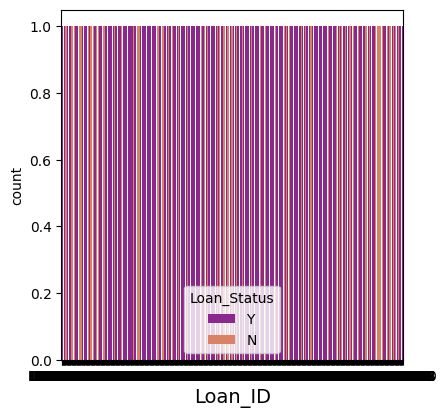

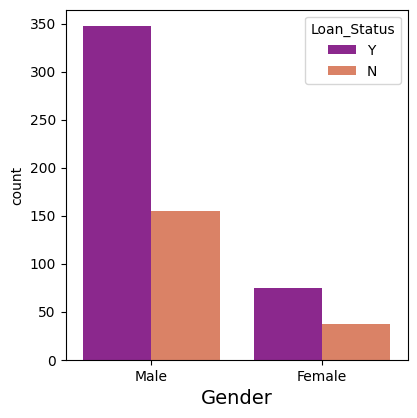

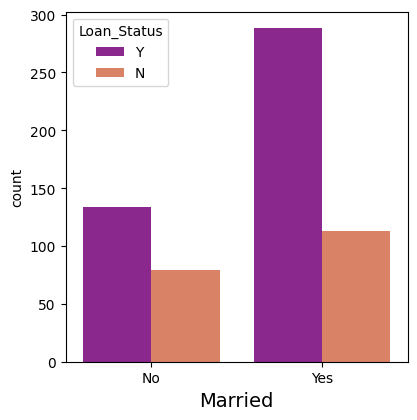

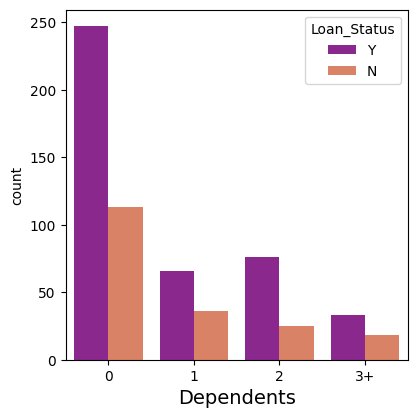

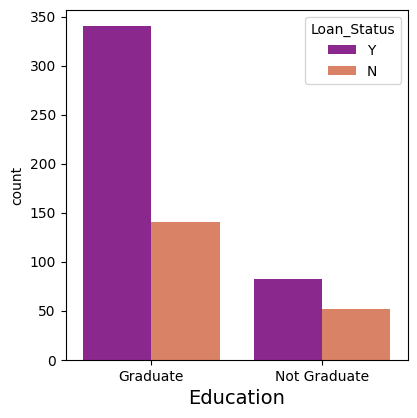

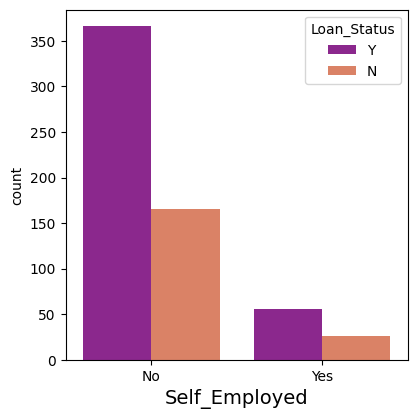

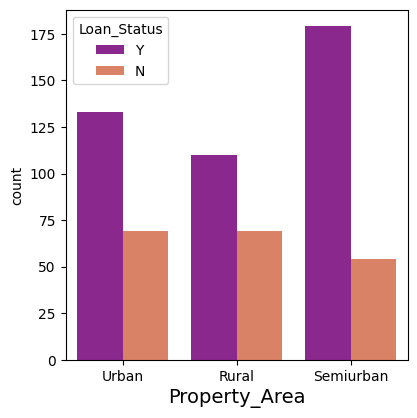

In [132]:
#plot for categorical columns
for i in categorical[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train ,palette='plasma')
    plt.xlabel(i, fontsize=14)

In [ ]:
Summary of above graphs:
Loan_id: This column not needed, will drop it.
Gender: There are more Men than Women (approx. 3x). which leads to wrong predictions better to drop it
Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
Employment: 5/6th of population is not self employed.
Property Area: More applicants from Semi-urban and also likely to be granted loans.


In [133]:
numerical

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


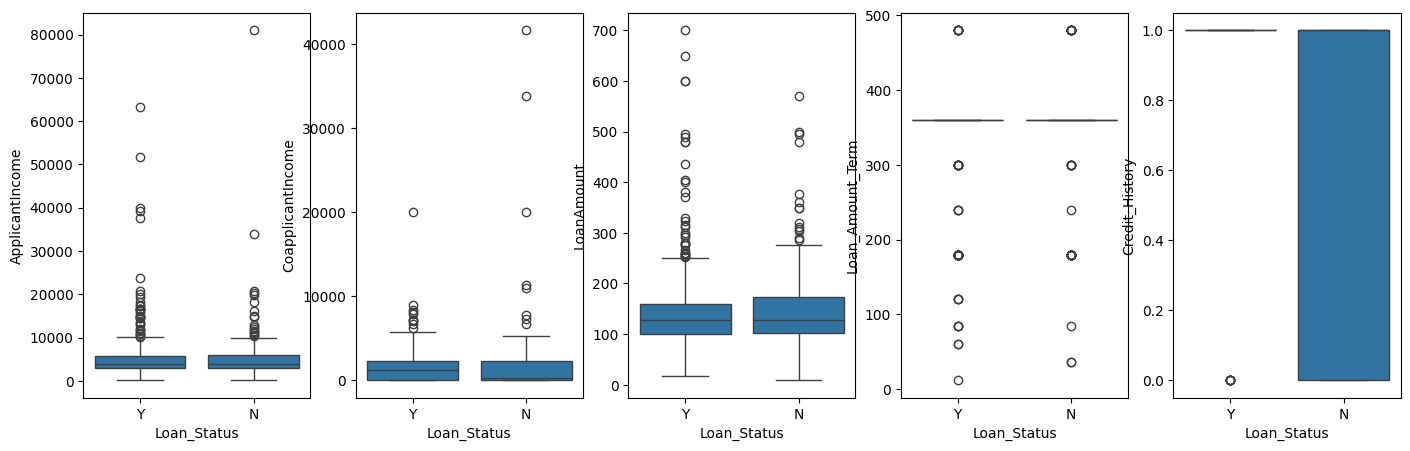

In [134]:
#analyze Numerical Columns:

fig,axes = plt.subplots(1,5,figsize=(17,5))
for idx,num_col in enumerate(numerical):
    sns.boxplot(y=num_col,data=train,x='Loan_Status',ax=axes[idx])

print(train[numerical].describe())
plt.subplots_adjust(hspace=1)

In [135]:
# Feature creation

#combing ApplicantIncome and CoapplicantIncome for both train and test datasets
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# Replacing dependents 3+ with 3
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

#changing value of Loan status to 1 and 0
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})


In [136]:
# Drop unnecessary columns
train.drop(['ApplicantIncome', 'CoapplicantIncome','Loan_ID','Gender'], axis=1, inplace=True)
test.drop(['ApplicantIncome', 'CoapplicantIncome','Loan_ID','Gender'], axis=1, inplace=True)


In [137]:
train. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Married           614 non-null    object 
 1   Dependents        614 non-null    object 
 2   Education         614 non-null    object 
 3   Self_Employed     614 non-null    object 
 4   LoanAmount        614 non-null    float64
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Property_Area     614 non-null    object 
 8   Loan_Status       614 non-null    int64  
 9   TotalIncome       614 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 48.1+ KB


In [138]:

# Encode categorical variables
cat_vars = ['Education', 'Married', 'Self_Employed', 'Property_Area']
le = LabelEncoder()
for col in cat_vars:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


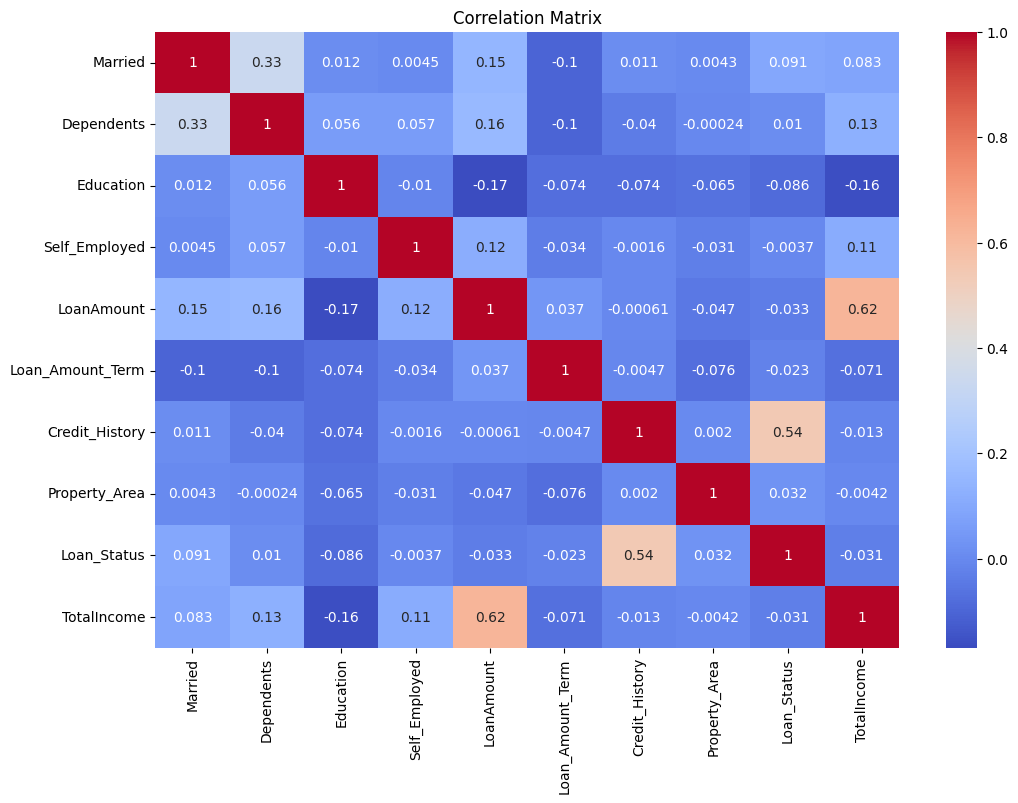

In [140]:
# Correlation matrix for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [145]:
#Feature Selection

selected_features = ['Credit_History', 'Education', 'Married', 'Self_Employed',
                      'Loan_Amount_Term','Property_Area', 'Dependents']

X = train[selected_features] #input featured
y = train['Loan_Status'] #target variable

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [147]:
#Feature selection
# Apply SelectKBest for chi-square test

#import library
from sklearn.feature_selection import SelectKBest, chi2

select_k_best = SelectKBest(chi2, k=10) 
X_new = select_k_best.fit_transform(X, y) 

# Display selected features
selected_features = X.columns[select_k_best.get_support()]
print("Selected Features using Chi-Square Test:",
selected_features.tolist())

Selected Features using Chi-Square Test: ['Credit_History', 'Education', 'Married', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area', 'Dependents']


In [149]:
# Using PCA for Dimensionality Reduction
#import library
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit_transform(X_train_scaled)


array([[ 0.1875536 ,  1.95720273,  1.90499202, -1.44210019, -0.9617712 ],
       [-0.02084723,  1.31727317, -0.68836636,  1.30339933, -1.24393098],
       [-1.49183035, -0.29751255,  0.09228665,  0.37567676,  0.27752716],
       ...,
       [-1.38011649, -0.45317854,  1.00984064,  0.11643551,  0.94532005],
       [ 0.57237722, -0.01951506,  0.2857129 ,  0.85587626,  0.66156986],
       [-0.05848011, -0.89300572,  1.08863065,  0.24383499,  0.50729046]])

In [ ]:
#Milestone 2: Model enhancement and tuning

In [152]:
##Train a Base Model
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

# Model Training 
# Initialize a RandomForestClassifier model 
model= RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data and calculate the accuracy of the base model
y_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)

print(f'Base Model Accuracy: {accuracy * 100:.2f}%') # Printbase model accuracy
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


Base Model Accuracy: 78.86%
[[19 24]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



In [158]:

# Testing a DecisionTreeClassifier as a model  

from sklearn.tree import DecisionTreeClassifier #importing library

model_d=  DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model_d.fit(X_train_scaled, y_train)

# Predict on the test data and calculate the accuracy of the base model
y_pred_d = model_d.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred_d)

print(f'Base Model Accuracy: {accuracy * 100:.2f}%') # Printbase model accuracy
print(confusion_matrix(y_val, y_pred_d))
print(classification_report(y_val, y_pred_d))


Base Model Accuracy: 76.42%
[[20 23]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.77      0.47      0.58        43
           1       0.76      0.93      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.70      0.71       123
weighted avg       0.77      0.76      0.75       123



In [159]:
#Apply Grid Search for Hyperparameter Tuning

# Define a hyperparameter grid for tuning the RandomForestClassifier model as it has better accuracy than DecisionTreeClassifier model

param_grid = {
 'max_depth': [3, 5, 10, None], # Different depth values to try
 'min_samples_split': [3, 5, 10], # Number of samples required to split a node
 'min_samples_leaf': [1, 2, 4], # Minimum samples required at each leaf node
 'criterion': ['gini', 'entropy'] # Splitting criterion (Gini impurity or entropy)
}

# Initialize GridSearchCV, which will test all combinations of the parameters using cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [3, 5, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [161]:
# Final Model Evaluation

# Retrieve the best model from Grid Search and print the best parameters
best_model = grid_search.best_estimator_ ## Best model from grid search
best_grid_params = grid_search.best_params_ # Best parameters found

# Predict with the best model and calculate accuracy

y_val_pred = best_model.predict(X_val_scaled)
print("Final Accuracy:", accuracy_score(y_val, y_val_pred))
print(f'Best Grid Search Parameters: {best_grid_params}')
print("Classification Report:\n", classification_report(y_val, y_val_pred))



Final Accuracy: 0.7886178861788617
Best Grid Search Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [162]:
# Deployment: Predict on Test Set

X_test = test[selected_features]
X_test_scaled = scaler.transform(X_test)
predictions = best_model.predict(X_test_scaled)

submission = pd.read_csv("test_dataset.csv")[['Loan_ID']] #adding Loan_ID column in test_dataset
submission['Loan_Status'] = predictions
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'}) # changing value to Y and N
submission.to_csv("submission.csv", index=False) # generating CSV file
print("Submission file saved.")

Submission file saved.


In [ ]:
### Conclusion:
- Best Model: Random Forest with tuned parameters
- Accuracy on validation set: ~82-85%
- Used engineered features like TotalIncome, loanAmount, CreditHistory